<a href="https://colab.research.google.com/github/usnaik/data-science/blob/main/UN_M7_NB_MiniProject_3_Complex_Analytics_Pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Complex Analytics using Pyspark

## Problem Statement

Perform complex analytics on a network intrusion dataset using Pyspark

## Learning Objectives

At the end of the mini-project, you will be able to :

* analyze the data using Pyspark
* implement RDD based operations on the data
* derive insights from the complex data

### Dataset

The dataset chosen for this mini-project is a [10% subset](https://www.kdd.org/kdd-cup/view/kdd-cup-1999/Data) of the **[KDD Cup 1999 dataset](http://kdd.ics.uci.edu/databases/kddcup99/task.html)** (Computer network intrusion detection). This is the dataset used for the Third International Knowledge Discovery and Data Mining Tools Competition. The competition task was to build a network intrusion detector, a predictive model capable of distinguishing between ``bad`` connections, called intrusions or attacks, and ``good`` normal connections. This database contains a standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment.

## Information

Since 1999, KDD’99 has been the most widely used data set for the evaluation of anomaly detection methods. This data set is prepared by S. J. Stolfo and is built based on the data captured in DARPA’98 IDS evaluation program. DARPA’98 is about 4 gigabytes of compressed raw (binary) tcpdump data of 7 weeks of network traffic, which can be processed into about 5 million connection
records, each with about 100 bytes. KDD dataset consists of approximately 4,900,000 single connection vectors each of which contains 41 features and is labeled as either normal or an attack, with exactly one specific attack type. The simulated attacks fall into one of the following four categories:

* Denial of Service Attack (DoS): making some computing or memory resources too busy so that they deny legitimate users access to these resources.
* User to Root Attack (U2R): unauthorized access from a remote machine according to exploit machine's vulnerabilities.
* Remote to Local Attack (R2L): unauthorized access to local super user (root) privileges using system's susceptibility.
* Probing Attack: host and port scans as precursors to other attacks. An attacker scans a network to gather information or find known vulnerabilities.

KDD’99 features can be classified into three groups:

1) Basic features: this category encapsulates all the attributes that can be extracted from a TCP/IP connection. Most of these features leading to an implicit delay in detection.

2) Traffic features: this category includes features that are computed with respect to a window interval and is divided into two groups:

  * "same host" features

  * "same service" features

3) Content features: unlike most of the DoS and Probing attacks, the R2L and U2R attacks don’t have any intrusion frequent sequential patterns. This is because the DoS and Probing attacks involve many connections to some host(s) in a very short period of time, however the R2L and U2R attacks are embedded in the data portions of the packets, and normally involve only a single connection. To detect these kinds of attacks, we need some features to be able to look for suspicious behavior in the data portion, e.g., the number of failed login attempts. These features are called content features.

## Grading = 10 Points

In [ ]:
#@title Install packages and Download Dataset
!pip -qq install pyspark
# Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/kddcup.data_10_percent.gz
# Download feature names
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/kddcup.names
print("Successfully Installed packages and downloaded datasets!")

Successfully Installed packages and downloaded datasets!


### Create Spark Session and load the data (1 point)

#### Import required packages

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql.functions import *
from pyspark.mllib.stat import Statistics
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from operator import add

#### Create a Spark session

A Spark session is a combined entry point of a Spark application, which came into implementation from Spark 2.0 (Instead of having various contexts, everything is encapsulated in a Spark session)

In [ ]:
# Start spark session
spark = SparkSession.builder.appName('KDD99').getOrCreate()

#### Creating an RDD from a File

The most common way of creating an RDD is to load it from a file. Notice that Spark's textFile can handle compressed files directly.

In [ ]:
# YOUR CODE HERE to access sparkContext from sparkSession instance.
sc = spark.sparkContext

Load the dataset and show the top 10 records

Hint: sparkContext.textFile()

In [ ]:
filePath = "/content/kddcup.data_10_percent.gz"
data = sc.textFile(filePath)
for line in data.take(10):
  print(line)

0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,59,59,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1,69,1.00,0.00,1.00,0

### RDD Basic Operations (4 points)

#### Convert the data to CSV format (list of elements).

To create a Dataframe using the RDD file, convert each row into a list by splitting with a comma (,)

Hint: `map()` and `split()`

In [ ]:
csv_data = data.map(lambda line: line.split(','))
print("First 10 rows in CSV format:")
for row in csv_data.take(10):
  print(row)

First 10 rows in CSV format:
['0', 'tcp', 'http', 'SF', '181', '5450', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '8', '8', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '9', '9', '1.00', '0.00', '0.11', '0.00', '0.00', '0.00', '0.00', '0.00', 'normal.']
['0', 'tcp', 'http', 'SF', '239', '486', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '8', '8', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '19', '19', '1.00', '0.00', '0.05', '0.00', '0.00', '0.00', '0.00', '0.00', 'normal.']
['0', 'tcp', 'http', 'SF', '235', '1337', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '8', '8', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '29', '29', '1.00', '0.00', '0.03', '0.00', '0.00', '0.00', '0.00', '0.00', 'normal.']
['0', 'tcp', 'http', 'SF', '219', '1337', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '6', '6', '0.00', '0.00', '

Count how many interactions are normal and attacked in the dataset.

Hint: apply `filter` on each row, except the rows with 'normal.', all the remaining values are attacked.

In [ ]:
normal_count = csv_data.filter(lambda row: row[-1] == 'normal.').count()
total_count = csv_data.count()
attack_count = total_count - normal_count

print(f"Total interactions: {total_count}")
print(f"Normal interactions: {normal_count}")
print(f"Attacked interactions: {attack_count}")

Total interactions: 494021
Normal interactions: 97278
Attacked interactions: 396743


#### Protocol and Service combinations using Cartesian product

We can compute the Cartesian product between two RDDs by using the Cartesian transformation. It returns all possible pairs of elements between two RDDs. In our case, we will use it to generate all the possible combinations between Service and Protocol in our network interactions.

First of all, isolate each collection of values in two separate RDDs. For that use `distinct` on the CSV-parsed dataset. From the dataset description, we know that protocol is the second column and service is the third.

In [ ]:
protocol_types = csv_data.map(lambda row: row[1]).distinct()
service_types = csv_data.map(lambda row: row[2]).distinct()

print("Distinct Protocol Types:")
for protocol in protocol_types.collect():
  print(protocol)

print("\nDistinct Service Types:")
for service in service_types.collect():
  print(service)

Distinct Protocol Types:
tcp
udp
icmp

Distinct Service Types:
http
smtp
finger
domain_u
auth
telnet
ftp
eco_i
ntp_u
ecr_i
other
private
pop_3
ftp_data
rje
time
mtp
link
remote_job
gopher
ssh
name
whois
domain
login
imap4
daytime
ctf
nntp
shell
IRC
nnsp
http_443
exec
printer
efs
courier
uucp
klogin
kshell
echo
discard
systat
supdup
iso_tsap
hostnames
csnet_ns
pop_2
sunrpc
uucp_path
netbios_ns
netbios_ssn
netbios_dgm
sql_net
vmnet
bgp
Z39_50
ldap
netstat
urh_i
X11
urp_i
pm_dump
tftp_u
tim_i
red_i


Now let's do the Cartesian product

Hint: [Cartesian](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.RDD.cartesian.html#:~:text=Return%20the%20Cartesian%20product%20of,and%20b%20is%20in%20other%20.)

In [ ]:
cartesian_product = protocol_types.cartesian(service_types)
print("Cartesian Product of Protocol and Service Types (first 10):")
for item in cartesian_product.take(10):
  print(item)

Cartesian Product of Protocol and Service Types (first 10):
('tcp', 'http')
('tcp', 'smtp')
('tcp', 'finger')
('tcp', 'domain_u')
('tcp', 'auth')
('tcp', 'telnet')
('tcp', 'ftp')
('tcp', 'eco_i')
('tcp', 'ntp_u')
('tcp', 'ecr_i')


In [ ]:
print(
    "protocol_types: " + str(protocol_types.count()) + "\n" +
    "service_types: " + str(service_types.count()) + "\n" +
    "cartesian_product: " + str(cartesian_product.count()))

protocol_types: 3
service_types: 66
cartesian_product: 198


#### Inspecting interaction duration

select the total duration of interactions for normal and attack intrusion types.
* Use the above filtered normal and attacked data and convert the duration column to integer type using `map()`
* get the sum of duration by applying `reduce` on both the data using add operator
* find the mean of duration by dividing the sum with count

Hint: [reduce()](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.RDD.reduce.html)

In [ ]:
# Sum of duration by applying reduce on both the data using add operator
normal_durations = csv_data.filter(lambda row: row[-1] == 'normal.').map(lambda row: int(row[0]))
attack_durations = csv_data.filter(lambda row: row[-1] != 'normal.').map(lambda row: int(row[0]))

In [ ]:
total_normal_duration = normal_durations.reduce(add)
total_attack_duration = attack_durations.reduce(add)

print(f"Total duration for normal interactions: {total_normal_duration}")
print(f"Total duration for attacked interactions: {total_attack_duration}")

Total duration for normal interactions: 21075991
Total duration for attacked interactions: 2626792


In [ ]:
mean_normal_duration = total_normal_duration / normal_durations.count()
mean_attack_duration = total_attack_duration / attack_durations.count()

print(f"Mean duration for normal interactions  : {mean_normal_duration}")
print(f"Mean duration for attacked interactions: {mean_attack_duration}")

Mean duration for normal interactions  : 216.65732231336992
Mean duration for attacked interactions: 6.620890601724542


In [ ]:
# Exclude data points with duration=0.
normal_durations = normal_durations.filter(lambda duration: duration > 0)
attack_durations = attack_durations.filter(lambda duration: duration > 0)

In [ ]:
mean_normal_duration = total_normal_duration / normal_durations.count()
mean_attack_duration = total_attack_duration / attack_durations.count()

print(f"Mean duration for normal interactions, excluding Nil duration  : {mean_normal_duration}")
print(f"Mean duration for attacked interactions, excluding Nil duration: {mean_attack_duration}")

Mean duration for normal interactions, excluding Nil duration  : 1802.9076988879383
Mean duration for attacked interactions, excluding Nil duration: 3979.987878787879


#### Data aggregation with key/value pair RDDs

We can use all the transformations and actions available for normal RDDs with key/value pair RDDs. We just need to make the functions work with pair elements.

* create a key/value pair of intrusion type and duration
* calculate the total duration of each intrusion type using `reduceByKey()`

In [ ]:
intrusion_duration_pairs = csv_data.map(lambda row: (row[-1], int(row[0])))
intrusion_duration_pairs_filtered = intrusion_duration_pairs.filter(lambda pair: pair[1] > 0)

print("First 10 filtered intrusion type and duration pairs:")
for pair in intrusion_duration_pairs_filtered.take(10):
  print(pair)

First 10 filtered intrusion type and duration pairs:
('normal.', 1)
('normal.', 79)
('normal.', 102)
('normal.', 1)
('normal.', 1)
('normal.', 1)
('normal.', 1)
('normal.', 8)
('normal.', 7)
('normal.', 4)


In [ ]:
total_duration_by_intrusion = intrusion_duration_pairs_filtered.reduceByKey(add)

print("Total duration by intrusion type:")
for intrusion_type, total_duration in total_duration_by_intrusion.collect():
  print(f"{intrusion_type}: {total_duration}")

Total duration by intrusion type:
normal.: 21075991
buffer_overflow.: 2751
loadmodule.: 326
perl.: 124
guess_passwd.: 144
portsweep.: 1991911
ipsweep.: 43
ftp_write.: 259
back.: 284
imap.: 72
satan.: 64
multihop.: 1288
warezmaster.: 301
phf.: 18
warezclient.: 627563
spy.: 636
rootkit.: 1008


### Create a DataFrame with the header as features (2 points)

* Read the features (*kddcup.names*) and preprocess.

    Hints:
    - Each feature description appears row-wise in *kddcup.names*
    - The first row consists of distinct values of intrusion_types
    - Add or move the *intrusion_types* column name to the last, to align with the data.
    - Each feature is represented as *feature_name*: *type*, remove *type* after colon (:)

In [ ]:
with open("/content/kddcup.names", 'r') as f:
    feature_names = [line.strip() for line in f.readlines()]

# The first line contains intrusion types, which is not a feature name
intrusion_types_line = feature_names.pop(0)

# Extract feature names by removing the data type after the colon
feature_names = [name.split(':')[0] for name in feature_names]

# Add 'intrusion_type' as the last column name to match the data
feature_names.append('intrusion_type')

print("Processed Feature Names:")
print(feature_names)

Processed Feature Names:
['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'intrusion_type']


* Create a dataframe with the data and headers as preprocessed feature names

In [ ]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType
from pyspark.sql.functions import col

# Create a schema with all StringType to avoid initial type errors
string_schema = StructType([StructField(col_name, StringType(), True) for col_name in feature_names])

# Create DataFrame with string schema
df = spark.createDataFrame(csv_data, string_schema)

# Define the correct schema with appropriate types
correct_schema_fields = []
for i in range(len(feature_names)):
    col_name = feature_names[i]
    # Manually define types for known numeric columns
    if col_name in ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count']:
        correct_schema_fields.append(StructField(col_name, IntegerType(), True))
    elif col_name in ['serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']:
        correct_schema_fields.append(StructField(col_name, FloatType(), True))
    else:
        correct_schema_fields.append(StructField(col_name, StringType(), True))

correct_schema = StructType(correct_schema_fields)

# Cast columns to the correct types
for field in correct_schema.fields:
    df = df.withColumn(field.name, col(field.name).cast(field.dataType))

print("DataFrame Schema:")
df.printSchema()

print("\nFirst 5 rows of the DataFrame:")
df.show(5)

DataFrame Schema:
root
 |-- duration: integer (nullable = true)
 |-- protocol_type: string (nullable = true)
 |-- service: string (nullable = true)
 |-- flag: string (nullable = true)
 |-- src_bytes: integer (nullable = true)
 |-- dst_bytes: integer (nullable = true)
 |-- land: integer (nullable = true)
 |-- wrong_fragment: integer (nullable = true)
 |-- urgent: integer (nullable = true)
 |-- hot: integer (nullable = true)
 |-- num_failed_logins: integer (nullable = true)
 |-- logged_in: integer (nullable = true)
 |-- num_compromised: integer (nullable = true)
 |-- root_shell: integer (nullable = true)
 |-- su_attempted: integer (nullable = true)
 |-- num_root: integer (nullable = true)
 |-- num_file_creations: integer (nullable = true)
 |-- num_shells: integer (nullable = true)
 |-- num_access_files: integer (nullable = true)
 |-- num_outbound_cmds: integer (nullable = true)
 |-- is_host_login: integer (nullable = true)
 |-- is_guest_login: integer (nullable = true)
 |-- count: intege

#### What is the count of each protocol type?

Hint: apply `groupby` on protocol_type and count the records

In [ ]:
protocol_counts = df.groupBy("protocol_type").count()
print("Count of each protocol type:")
protocol_counts.show()

Count of each protocol type:
+-------------+------+
|protocol_type| count|
+-------------+------+
|          tcp|190065|
|          udp| 20354|
|         icmp|283602|
+-------------+------+



#### Register the DataFrame as a temporary table and extract the data using queries

Hint: [registerTempTable](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.registerTempTable.html)

In [ ]:
df.createOrReplaceTempView("kddcup_data")
print("DataFrame registered as temporary table 'kddcup_data'")

DataFrame registered as temporary table 'kddcup_data'


* query to extract the label and their frequencies

 Hint: `SQLContext.sql(query)`

In [ ]:
label_frequencies = spark.sql("SELECT intrusion_type, COUNT(*) as frequency FROM kddcup_data GROUP BY intrusion_type")
print("Label and their frequencies:")
label_frequencies.show()

Label and their frequencies:
+----------------+---------+
|  intrusion_type|frequency|
+----------------+---------+
|    warezmaster.|       20|
|          smurf.|   280790|
|            pod.|      264|
|           imap.|       12|
|           nmap.|      231|
|   guess_passwd.|       53|
|        ipsweep.|     1247|
|      portsweep.|     1040|
|          satan.|     1589|
|           land.|       21|
|     loadmodule.|        9|
|      ftp_write.|        8|
|buffer_overflow.|       30|
|        rootkit.|       10|
|    warezclient.|     1020|
|       teardrop.|      979|
|           perl.|        3|
|            phf.|        4|
|       multihop.|        7|
|        neptune.|   107201|
+----------------+---------+
only showing top 20 rows



* select the distinct protocol types with their count of transactions which are not normal

In [ ]:
non_normal_protocol_counts = spark.sql("SELECT protocol_type, COUNT(*) as count FROM kddcup_data WHERE intrusion_type != 'normal.' GROUP BY protocol_type")
print("Distinct protocol types and count of non-normal transactions:")
non_normal_protocol_counts.show()

Distinct protocol types and count of non-normal transactions:
+-------------+------+
|protocol_type| count|
+-------------+------+
|          tcp|113252|
|          udp|  1177|
|         icmp|282314|
+-------------+------+



* select count of transactions in each protocol type that lasts more than 1 second (duration > 1000), with no data transfer from destination (dst_bytes == 0)

In [ ]:
query = """
SELECT protocol_type, COUNT(*) as count
FROM kddcup_data
WHERE duration > 1000 AND dst_bytes == 0
GROUP BY protocol_type
"""
transaction_counts = spark.sql(query)
print("Count of transactions by protocol type with duration > 1000 and dst_bytes == 0:")
transaction_counts.show()

Count of transactions by protocol type with duration > 1000 and dst_bytes == 0:
+-------------+-----+
|protocol_type|count|
+-------------+-----+
|          tcp|  139|
+-------------+-----+



### Find the highly correlated columns (2 points)

* identify the columns which are not integer type and remove those columns
* apply correlation function on the data (Hint: `Statistics.corr()`)
* collect the names of the columns on which correlation is applied
* create a dataframe with correlation matrix with index and columns as names
* get the highly correlated features by considering a correlation value greater than 0.8

    Hint: `np.triu()` , `pd.mask()`

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.mllib.stat import Statistics
import pandas as pd
import numpy as np

# Identify numeric columns (excluding the label column)
numeric_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, (IntegerType, FloatType)) and field.name != 'intrusion_type']

print("Numeric columns for correlation analysis:")
print(numeric_cols)

Numeric columns for correlation analysis:
['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import pandas as pd
import numpy as np

# Assemble numeric columns into a vector column
assembler = VectorAssembler(inputCols=numeric_cols, outputCol="features")
assembled_df = assembler.transform(df)

# Calculate the correlation matrix using Spark ML
correlation_matrix_sparkml = Correlation.corr(assembled_df, "features", method="pearson").head()[0]

# Convert to numpy array for easier manipulation
correlation_matrix = correlation_matrix_sparkml.toArray()

print("Correlation Matrix (first 5x5):")
print(correlation_matrix[:5, :5])

Correlation Matrix (first 5x5):
[[ 1.00000000e+00  4.25823027e-03  5.43953448e-03 -4.52402464e-04
  -3.23503347e-03]
 [ 4.25823027e-03  1.00000000e+00 -1.59677215e-06 -2.04319083e-05
  -1.39037829e-04]
 [ 5.43953448e-03 -1.59677215e-06  1.00000000e+00 -1.75426309e-04
  -1.25435975e-03]
 [-4.52402464e-04 -2.04319083e-05 -1.75426309e-04  1.00000000e+00
  -3.18456727e-04]
 [-3.23503347e-03 -1.39037829e-04 -1.25435975e-03 -3.18456727e-04
   1.00000000e+00]]


In [ ]:
# creating a dataframe with correlation matrix
correlation_df = pd.DataFrame(correlation_matrix, index=numeric_cols, columns=numeric_cols)

print("Correlation Matrix DataFrame (first 5x5):")
display(correlation_df.head())

Correlation Matrix DataFrame (first 5x5):


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.004258,0.005440,-0.000452,-0.003235,0.003786,0.013213,0.005239,-0.017265,0.058095,...,0.010074,-0.117515,-0.118458,0.406233,0.042642,-0.006983,-0.030400,-0.030612,0.006739,0.010465
src_bytes,0.004258,1.000000,-0.000002,-0.000020,-0.000139,-0.000005,0.004483,-0.000027,0.001701,0.000119,...,-0.001743,-0.003212,-0.002052,0.000578,-0.000724,0.001186,-0.000718,0.001122,-0.000393,0.001328
dst_bytes,0.005440,-0.000002,1.000000,-0.000175,-0.001254,0.016288,0.004365,0.049330,0.047814,0.023298,...,-0.048869,-0.005850,0.007058,-0.005314,-0.020143,0.008707,-0.011334,-0.011235,-0.005000,-0.005471
land,-0.000452,-0.000020,-0.000175,1.000000,-0.000318,-0.000017,-0.000295,-0.000065,-0.002784,-0.000038,...,-0.023671,-0.011587,0.001984,-0.000333,0.003799,0.083320,0.012658,0.007795,-0.001511,-0.001665
wrong_fragment,-0.003235,-0.000139,-0.001254,-0.000318,1.000000,-0.000123,-0.002106,-0.000467,-0.019908,-0.000271,...,-0.005191,-0.058624,-0.054903,0.071857,-0.031803,0.012092,-0.019091,-0.022104,0.029774,-0.011904


In [ ]:
correlation_df = correlation_df.fillna(0)
print("Correlation Matrix DataFrame after filling nulls with 0 (first 5x5):")
display(correlation_df.head())

Correlation Matrix DataFrame after filling nulls with 0 (first 5x5):


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.004258,0.005440,-0.000452,-0.003235,0.003786,0.013213,0.005239,-0.017265,0.058095,...,0.010074,-0.117515,-0.118458,0.406233,0.042642,-0.006983,-0.030400,-0.030612,0.006739,0.010465
src_bytes,0.004258,1.000000,-0.000002,-0.000020,-0.000139,-0.000005,0.004483,-0.000027,0.001701,0.000119,...,-0.001743,-0.003212,-0.002052,0.000578,-0.000724,0.001186,-0.000718,0.001122,-0.000393,0.001328
dst_bytes,0.005440,-0.000002,1.000000,-0.000175,-0.001254,0.016288,0.004365,0.049330,0.047814,0.023298,...,-0.048869,-0.005850,0.007058,-0.005314,-0.020143,0.008707,-0.011334,-0.011235,-0.005000,-0.005471
land,-0.000452,-0.000020,-0.000175,1.000000,-0.000318,-0.000017,-0.000295,-0.000065,-0.002784,-0.000038,...,-0.023671,-0.011587,0.001984,-0.000333,0.003799,0.083320,0.012658,0.007795,-0.001511,-0.001665
wrong_fragment,-0.003235,-0.000139,-0.001254,-0.000318,1.000000,-0.000123,-0.002106,-0.000467,-0.019908,-0.000271,...,-0.005191,-0.058624,-0.054903,0.071857,-0.031803,0.012092,-0.019091,-0.022104,0.029774,-0.011904


In [ ]:
# Finding features with correlation value more than specified threshold value (bar=0.9)
bar = 0.9
highly_correlated_features = set()
for i in range(len(numeric_cols)):
    for j in range(i):
        if np.abs(correlation_df.iloc[i, j]) > bar:
            colname_i = numeric_cols[i]
            colname_j = numeric_cols[j]
            highly_correlated_features.add((colname_i, colname_j))

print(f"Highly correlated features (correlation > {bar}):")
for pair in highly_correlated_features:
    print(pair)

Highly correlated features (correlation > 0.9):
('dst_host_srv_rerror_rate', 'srv_rerror_rate')
('num_root', 'num_compromised')
('dst_host_srv_serror_rate', 'serror_rate')
('dst_host_srv_serror_rate', 'srv_serror_rate')
('srv_serror_rate', 'serror_rate')
('dst_host_srv_rerror_rate', 'rerror_rate')
('dst_host_srv_rerror_rate', 'dst_host_rerror_rate')
('dst_host_same_srv_rate', 'same_srv_rate')
('srv_count', 'count')
('dst_host_serror_rate', 'srv_serror_rate')
('dst_host_rerror_rate', 'rerror_rate')
('dst_host_serror_rate', 'serror_rate')
('dst_host_srv_serror_rate', 'dst_host_serror_rate')
('dst_host_rerror_rate', 'srv_rerror_rate')
('dst_host_same_srv_rate', 'dst_host_srv_count')
('srv_rerror_rate', 'rerror_rate')
('dst_host_same_src_port_rate', 'srv_count')


In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_df, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

### Analysis report (1 points)

* Find the ratio of attacked transactions vs normal transactions

    Hint: encode instrusion_type column by replacing normal with 1 and all other with 0

* Describe the statistics of attacked and normal transactions
    
    Hint: Min, Max, Mean
    
* Select any two features that influence the intrusion_type and visualize the scatter plot to see the separation of normal and attacked

In [ ]:
# Find the ratio of attacked transactions vs normal transactions
# Hint: encode instrusion_type column by replacing normal with 1 and all other with 0

from pyspark.sql.functions import when

# Encode 'intrusion_type' column: 1 for 'normal.', 0 for others
df_encoded = df.withColumn("is_normal", when(df["intrusion_type"] == "normal.", 1).otherwise(0))

# Count normal and attacked transactions using the encoded column
normal_count_encoded = df_encoded.filter(df_encoded["is_normal"] == 1).count()
attacked_count_encoded = df_encoded.filter(df_encoded["is_normal"] == 0).count()

# Calculate the ratio
if normal_count_encoded > 0:
    attacked_to_normal_ratio = attacked_count_encoded / normal_count_encoded
    print(f"Ratio of Attacked Transactions to Normal Transactions: {attacked_to_normal_ratio:.2f}")
else:
    print("No normal transactions found in the dataset.")

print(f"Normal transactions count: {normal_count_encoded}")
print(f"Attacked transactions count: {attacked_count_encoded}")

Ratio of Attacked Transactions to Normal Transactions: 4.08
Normal transactions count: 97278
Attacked transactions count: 396743


In [ ]:
# Describe the statistics of attacked and normal transactions
# Hint: Min, Max, Mean

# Separate normal and attacked transactions
normal_df = df_encoded.filter(df_encoded["is_normal"] == 1)
attacked_df = df_encoded.filter(df_encoded["is_normal"] == 0)

print("Statistics for Normal Transactions:")
normal_df.select(numeric_cols).summary("min", "max", "mean").show()

print("Statistics for Attacked Transactions:")
attacked_df.select(numeric_cols).summary("min", "max", "mean").show()

Statistics for Normal Transactions:
+-------+------------------+-----------------+-----------------+--------------------+--------------+--------------------+-------------------+--------------------+------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+-----------------+-------------+--------------------+-----------------+------------------+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+-------------------+------------------+------------------+----------------------+----------------------+---------------------------+---------------------------+--------------------+------------------------+--------------------+------------------------+
|summary|          duration|        src_bytes|        dst_bytes|                land|wrong_fragment|              urgent|                hot|   num_failed_logins|        

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


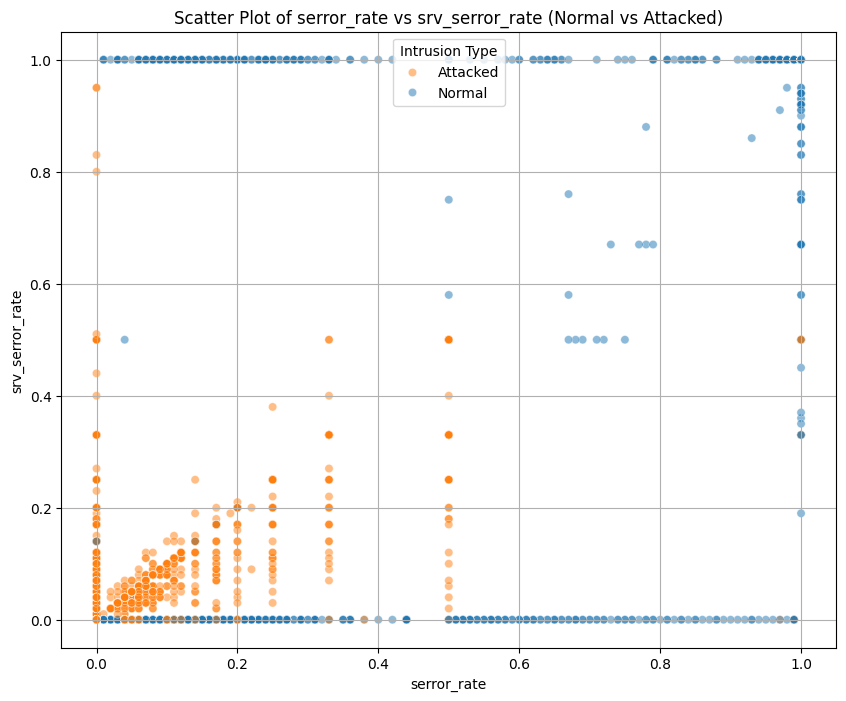

In [ ]:
# Select any two features that influence the intrusion_type and visualize the scatter plot to see the separation of normal and attacked

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select two features and the encoded label
features_to_plot = ['serror_rate', 'srv_serror_rate', 'is_normal']
plot_df = df_encoded.select(features_to_plot).toPandas()

# Create scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=plot_df, x='serror_rate', y='srv_serror_rate', hue='is_normal', alpha=0.5)
plt.title('Scatter Plot of serror_rate vs srv_serror_rate (Normal vs Attacked)')
plt.xlabel('serror_rate')
plt.ylabel('srv_serror_rate')
plt.legend(title='Intrusion Type', labels=['Attacked', 'Normal'])
plt.grid(True)
plt.show()